Jade-Marie Samala

## EXPLORE WEATHER TRENDS ##

**SET UP**

I downloaded data from udacity site using following basic sql codes:

`global_data.csv`

SELECT *

FROM global_data

`city_data.csv`

SELECT *

FROM city_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
global_data=pd.read_csv('raw/global_data.csv')

In [3]:
df_global=global_data.copy()
df_global['moving_avg']=pd.Series(df_global['avg_temp']).rolling(window=5).mean()

In [4]:
city_data=pd.read_csv('raw/city_data.csv')

In [5]:
df_los_angeles=city_data.copy().\
query('city=="Los Angeles" and country=="United States"')

In [6]:
df_los_angeles['moving_avg']=\
pd.Series(df_los_angeles['avg_temp']).rolling(window=7).mean()

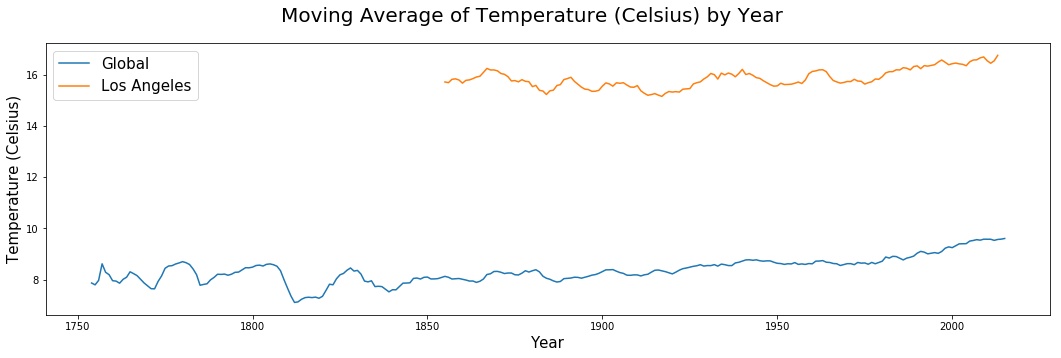

In [7]:
fig=plt.figure(figsize=(18,5))
plt.plot(df_global['year'],df_global['moving_avg'],label='Global')
plt.plot(df_los_angeles['year'],
         df_los_angeles['moving_avg'],
         label='Los Angeles')
plt.legend(loc=2,prop={'size':15})
fig.suptitle('Moving Average of Temperature (Celsius) by Year', fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Temperature (Celsius)',fontsize=15);

I chose to do a line plot to visualize the data in order to best show the change of temperature overtime.

#### OBSERVATION #1 ####
Due to being closer to the equator, it was no surprise that Los Angeles showed to be hotter on average compared to the global average. 

By taking a look at the graph above, it looks like both Los Angeles as well as the Global temperature average has slighly increased overall throughout the years.

Has the difference been consistent over time?
How do the changes in Los Angeles' temperature over time compare to the changes in the global average?

Let's further investigate this increase below!

## CHANGE IN TEMPERATURE ##

In [8]:
#I created a new column for both data frames to 
# show difference in average temperature

df_los_angeles['diff_avg_temp']=pd.Series(df_los_angeles['avg_temp']).\
rolling(window=2).apply(lambda x: x[1]-x[0], raw=True)

df_global['diff_avg_temp']=pd.Series(df_global['avg_temp']).\
rolling(window=2).apply(lambda x: x[1]-x[0], raw=True)

#I created a new column for both data frames to 
# show the moving average for this difference

df_los_angeles['moving_diff']=pd.Series(df_los_angeles['diff_avg_temp']).\
rolling(window=7).mean()

df_global['moving_diff']=pd.Series(df_global['diff_avg_temp']).\
rolling(window=7).mean()

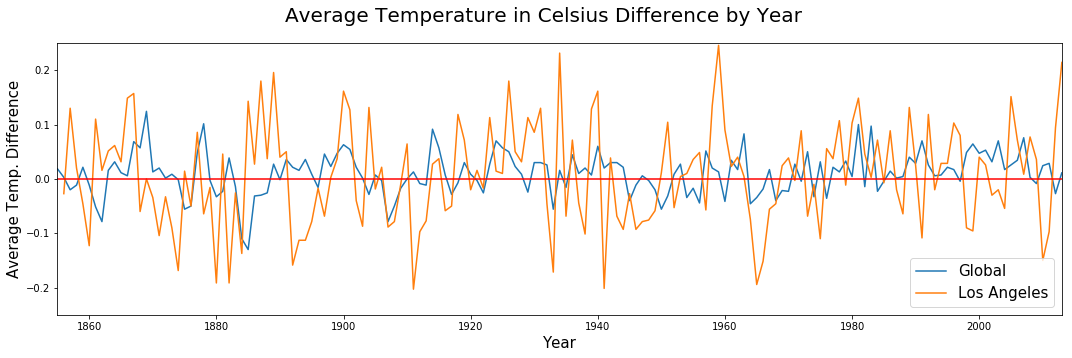

In [10]:
fig_diff=plt.figure(figsize=(18,5))

plt.xlim([1855,2013])
plt.ylim([-0.25,.25])
plt.plot(df_global['year'],df_global['moving_diff'], label='Global')
plt.plot(df_los_angeles['year'],df_los_angeles['moving_diff'],
         label='Los Angeles')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average Temp. Difference',fontsize=15)

plt.legend(loc=4,prop={'size': 15})
fig_diff.suptitle('Average Temperature in Celsius Difference by Year',
                  fontsize=20)
plt.axhline(0,c="red");

In [9]:
# Below, I only wanted to take into account where both city and global
# had information. Therefore, we should focus on the years between
# 1855 and 2013
print('Los Angeles Range of Temperature Difference:',
      '\nminimum=',
      df_los_angeles.query('year>=1853 &year<=2013').min().moving_diff,
      '\nmaximum=',
      df_los_angeles.query('year>=1853 &year<=2013').max().moving_diff)

Los Angeles Range of Temperature Difference: 
minimum= -0.2028571428571426 
maximum= 0.2457142857142858


In [11]:
print('Global Range of Temperature Difference:',
      '\nminimum=',
      df_global.query('year>=1853 &year<=2013').min().moving_diff,
      '\nmaximum=',
      df_global.query('year>=1853 &year<=2013').max().moving_diff)

Global Range of Temperature Difference: 
minimum= -0.13000000000000003 
maximum= 0.1242857142857143


#### OBSERVATION #2 ###

Based on the graph and calculations above, the variability of change in average temperature is much larger for Los
Angeles as compared to Global temperature.


## Positive vs. Negative Years ##
Now let's go ahead and compare the number of years in which there was a positive difference in temperature to the
number of years in which there was a negative difference.

In [12]:
print('Los Angeles:','\nYears w/ Decreasing Temperature=',
      sum(df_los_angeles.query('year>=1855 &year<=2013').moving_diff<0),
      '\nYears w/ Increasing Temperature=',
      sum(df_los_angeles.query('year>=1855 &year<=2013').moving_diff>=0),)

Los Angeles: 
Years w/ Decreasing Temperature= 72 
Years w/ Increasing Temperature= 86


In [13]:
print('Global:','\nYears w/ Decreasing Temperature=',
      sum(df_global.query('year>=1855 &year<=2013').moving_diff<0),
      '\nYears w/ Increasing Temperature=',
      sum(df_global.query('year>=1855 &year<=2013').moving_diff>=0),)

Global: 
Years w/ Decreasing Temperature= 58 
Years w/ Increasing Temperature= 101


#### OBSERVATION #3 ####
Based on our calculations above, the number of years in which our temperature was increasing far outweights our years of decreasing for both Los Angeles and globally.

## Overall Increase ##

Based on our very first graph, we know that our average temperature is moving in an upward direction.
Let's go ahead and compare proportionally how much they have increased from 1855 to 2013.

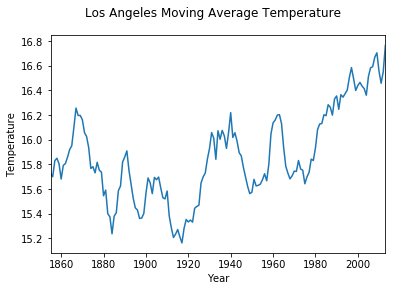

In [15]:
plt.xlim([1855,2013])
plt.plot(df_los_angeles.year,df_los_angeles.moving_avg)
plt.suptitle("Los Angeles Moving Average Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature');

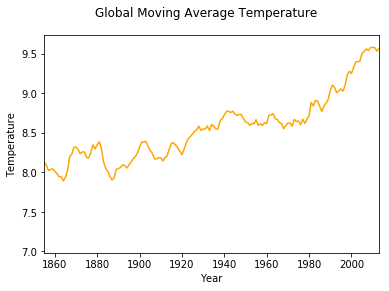

In [14]:
plt.xlim([1855,2013])
plt.plot(df_global.year,df_global.moving_avg,c='orange')
plt.suptitle("Global Moving Average Temperature")
plt.xlabel('Year')
plt.ylabel('Temperature');

#### OBSERVATION #4 ####
Just by looking at our graph, Los Angeles has increased in temperature (Celsius) of approximately 1 degree. Meanwhile,
looking at our global graph, we can see that on average, the global temperature has increased about 1.5 degree Celsius from 1855 to 2013.

This means that if we continue at this rate, on average, we would see an increase of about .625 degree Celsius per 100 years for Los Angeles and .9375 degree Celsius globally.